In [1]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 71kB 583kB/s ta 0:00:01
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from random_forest import build_model, load_data, train_test_split

## Load Data

In [20]:
X, y = load_data()

## Random Forest AS-IS

In [21]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
model = build_model(train_X, train_y)
predictions = model.predict(val_X)
mean_absolute_error(predictions, val_y)

0.2341904761904762

## Add horizontal, vertical lines as features

In [30]:
vertical_lines = [X.iloc[:, i::28].mean(axis=1) for i in range(28)]
horizontal_lines = \
    [X.iloc[:, i * 28:(i + 1) * 28].mean(axis=1) for i in range(28)]

X = pd.concat([X] + vertical_lines + horizontal_lines, axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
model = build_model(train_X, train_y)
predictions = model.predict(val_X)
mean_absolute_error(predictions, val_y)

0.23200000000000001

## Feature Importances

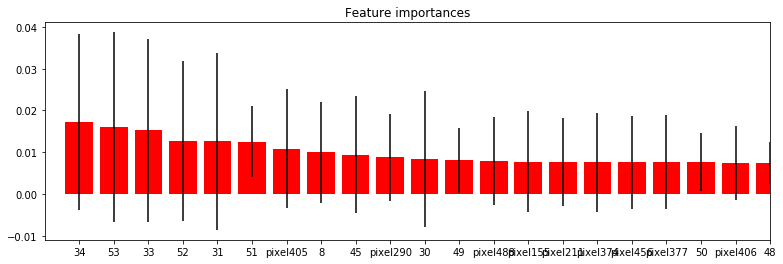

In [55]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(13, 4))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, 20])
plt.show()

In [53]:
X.columns[indices]

Index([        34,         53,         33,         52,         31,         51,
       'pixel405',          8,         45, 'pixel290',
       ...
       'pixel450', 'pixel449', 'pixel448', 'pixel447', 'pixel423', 'pixel421',
       'pixel420', 'pixel418', 'pixel393',   'pixel0'],
      dtype='object', length=840)